In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import os

In [2]:
os.chdir(r'../..') #change to project root dir

In [4]:
!python src/sood/algorithms/ae_2d.py \
    --run="predict" \
    --data-dir="./data/aia_171_2017_full_disk_256" \
    --test-dir="./data/aia_171_2017_full_disk_256" \
    -o "./output/aia_171_2017_256_ae_2d_quiet_pred" \
    --load-path="/Users/mariusgiger/Downloads/20210525-090159_ae2d_128_quiet/checkpoint" \
    --logger="file" \
    --z-dim 128 \
    --target-size 256 \
    --batch-size 32 \
    --mode "sample"

0it [00:00, ?it/s]/Users/mariusgiger/repos/master/sdo-cli/.venv/lib/python3.8/site-packages/torch/nn/functional.py:2970: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
713it [01:09, 10.22it/s]


In [5]:
!python src/sood/algorithms/ae_2d.py \
    --run="predict" \
    --data-dir="./data/aia_171_2017_full_disk_256" \
    --test-dir="./data/aia_171_2017_full_disk_256" \
    -o "./output/aia_171_2017_256_ae_2d_quiet_pred" \
    --load-path="/Users/mariusgiger/Downloads/20210525-090159_ae2d_128_quiet/checkpoint" \
    --logger="file" \
    --z-dim 128 \
    --target-size 256 \
    --batch-size 32 \
    --mode "pixel"

0it [00:00, ?it/s]/Users/mariusgiger/repos/master/sdo-cli/.venv/lib/python3.8/site-packages/torch/nn/functional.py:2970: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
713it [01:12,  9.81it/s]


In [12]:
pred_path = "./output/aia_171_2017_256_ae_2d_quiet_pred/20210525-114940_ae2d/predictions/predictions.txt"
pixel_pred_path = "./output/aia_171_2017_256_ae_2d_quiet_pred/20210525-115113_ae2d/predictions"
data_path = "./data/aia_171_2017_full_disk_256/test"

In [13]:
df = pd.read_csv(pred_path, header=None, names = ["img", "score"])
df.head()

,img,score
0,2017-01-01T000000__171.jpeg,0.002659
1,2017-01-01T120000__171.jpeg,0.002567
2,2017-01-02T000000__171.jpeg,0.002404
3,2017-01-02T120000__171.jpeg,0.002501
4,2017-01-03T000000__171.jpeg,0.002460


In [14]:
df = df.sort_values(by=['score'], ascending=False)
df.head(10)

,img,score
494,2017-09-06T120000__171.jpeg,0.004690
222,2017-04-22T120000__171.jpeg,0.004335
225,2017-04-24T000000__171.jpeg,0.004284
43,2017-01-22T120000__171.jpeg,0.004276
223,2017-04-23T000000__171.jpeg,0.004196
47,2017-01-24T120000__171.jpeg,0.004190
45,2017-01-23T120000__171.jpeg,0.004161
113,2017-02-26T120000__171.jpeg,0.004142
44,2017-01-23T000000__171.jpeg,0.004112
493,2017-09-06T000000__171.jpeg,0.004111


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

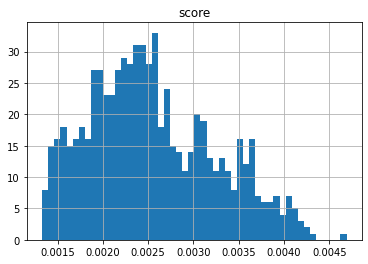

In [15]:
hist = df.hist(bins=50)
hist

In [16]:
df.describe()

,score
count,713.000000
mean,0.002543
std,0.000697
min,0.001331
25%,0.002010
50%,0.002453
75%,0.003052
max,0.004690


In [17]:
df.head(10)

,img,score
494,2017-09-06T120000__171.jpeg,0.004690
222,2017-04-22T120000__171.jpeg,0.004335
225,2017-04-24T000000__171.jpeg,0.004284
43,2017-01-22T120000__171.jpeg,0.004276
223,2017-04-23T000000__171.jpeg,0.004196
47,2017-01-24T120000__171.jpeg,0.004190
45,2017-01-23T120000__171.jpeg,0.004161
113,2017-02-26T120000__171.jpeg,0.004142
44,2017-01-23T000000__171.jpeg,0.004112
493,2017-09-06T000000__171.jpeg,0.004111


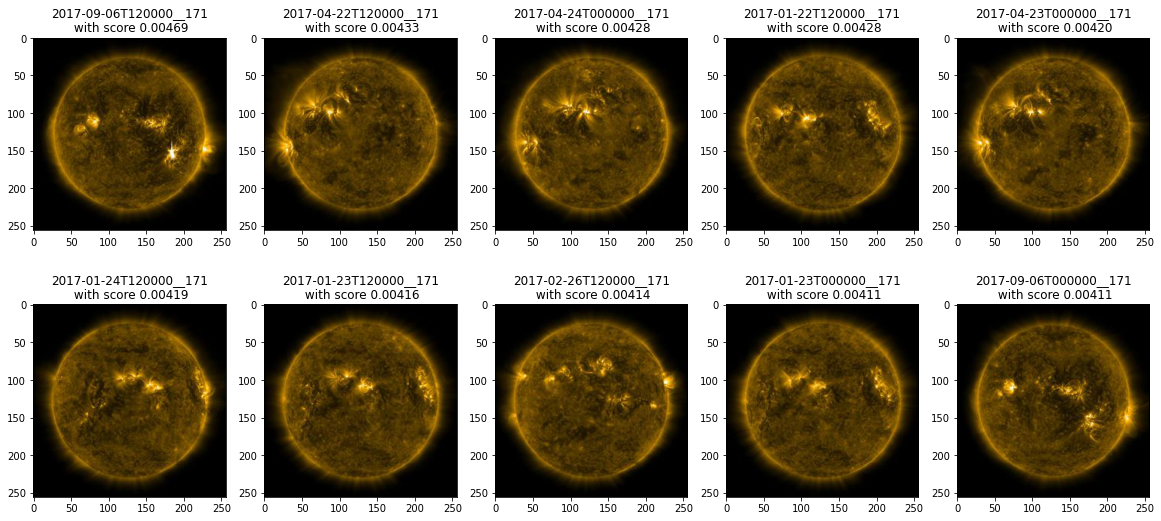

In [18]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df.head(10).iterrows():
    img_path = Path(data_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.asarray(img)
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
   
    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 
        

In [19]:
df_asc = df.sort_values(by=['score'], ascending=True)
df_asc.head(10)

,img,score
572,2017-10-15T120000__171.jpeg,0.001331
571,2017-10-15T000000__171.jpeg,0.001331
623,2017-11-10T120000__171.jpeg,0.001339
140,2017-03-12T120000__171.jpeg,0.001341
573,2017-10-16T000000__171.jpeg,0.001346
141,2017-03-13T000000__171.jpeg,0.001347
621,2017-11-09T120000__171.jpeg,0.001367
622,2017-11-10T000000__171.jpeg,0.001372
624,2017-11-11T000000__171.jpeg,0.001405
569,2017-10-14T000000__171.jpeg,0.001406


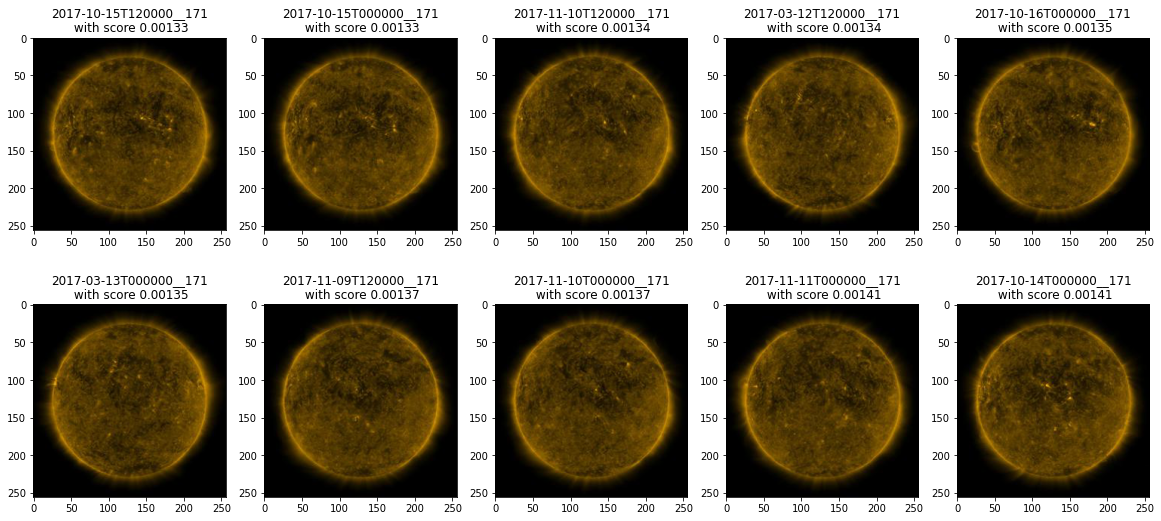

In [20]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df_asc.head(10).iterrows():
    img_path = Path(data_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.asarray(img)
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
   
    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 
        

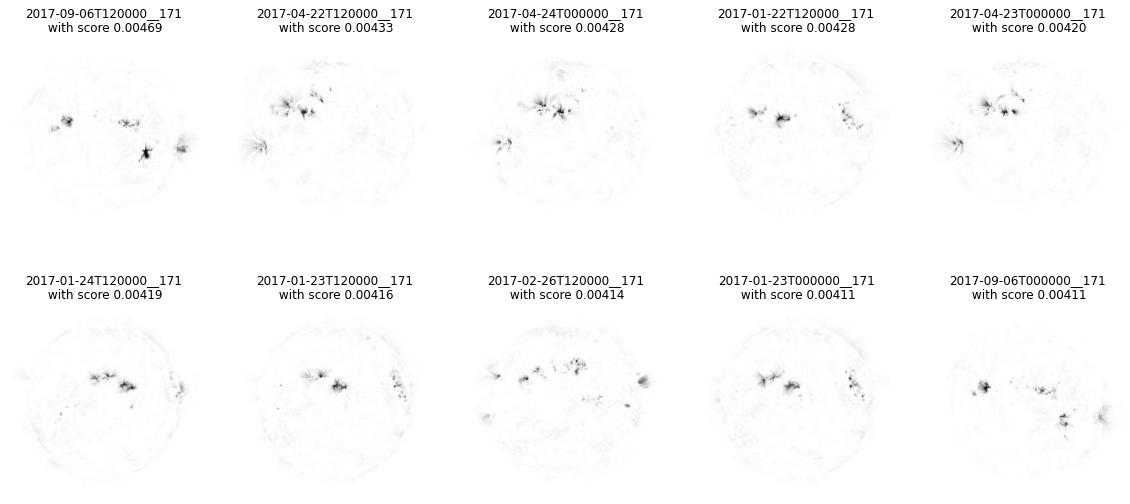

In [21]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df.head(10).iterrows():
    img_path = Path(pixel_pred_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.invert(np.asarray(img))
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
    axarr[row_index, column_index].spines['top'].set_visible(False)
    axarr[row_index, column_index].spines['right'].set_visible(False)
    axarr[row_index, column_index].spines['bottom'].set_visible(False)
    axarr[row_index, column_index].spines['left'].set_visible(False)
    axarr[row_index, column_index].xaxis.set_ticks([])
    axarr[row_index, column_index].yaxis.set_ticks([])

    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 

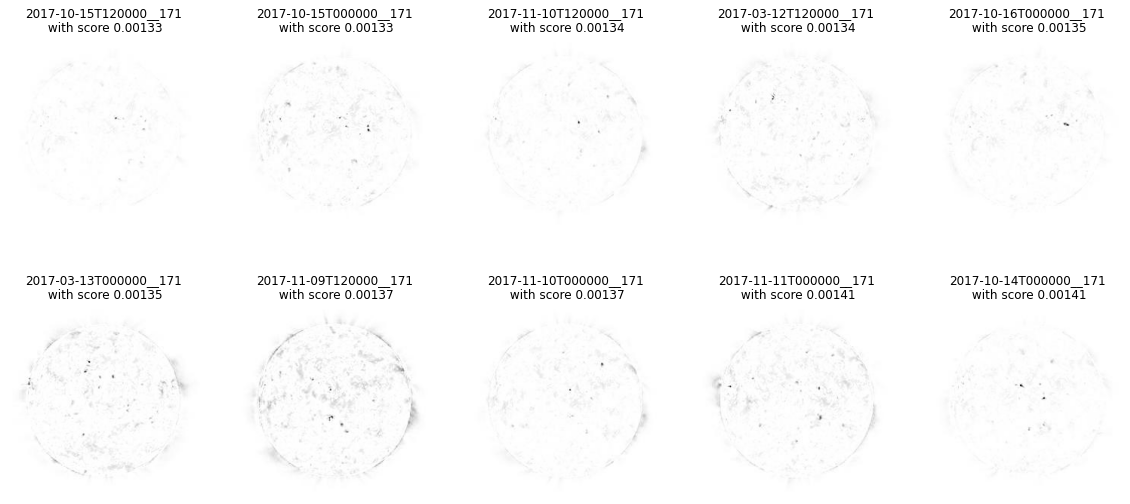

In [22]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df.sort_values(by=['score'], ascending=True).head(10).iterrows():
    img_path = Path(pixel_pred_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.invert(np.asarray(img))
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
    axarr[row_index, column_index].spines['top'].set_visible(False)
    axarr[row_index, column_index].spines['right'].set_visible(False)
    axarr[row_index, column_index].spines['bottom'].set_visible(False)
    axarr[row_index, column_index].spines['left'].set_visible(False)
    axarr[row_index, column_index].xaxis.set_ticks([])
    axarr[row_index, column_index].yaxis.set_ticks([])

    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 

In [25]:
img_path = "./data/aia_171_2017_full_disk_256/test/2017-09-06T120000__171.jpeg"
img_pred_path = pixel_pred_path + "/2017-09-06T120000__171.jpeg"


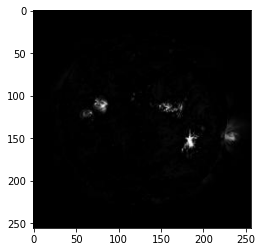

In [26]:
pred_img = Image.open(img_pred_path).convert("L")
arr_pred = np.asarray(pred_img)
plt.imshow(arr_pred, cmap='gray', vmin=0, vmax=255)

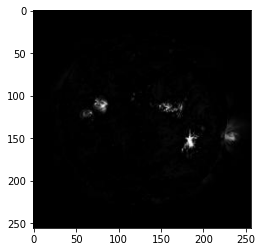

In [27]:
mask_threshold = 0
mask = arr_pred > mask_threshold
sel = np.zeros_like(arr_pred)
sel[mask] = arr_pred[mask]
plt.imshow(sel, cmap='gray', vmin=0, vmax=255)

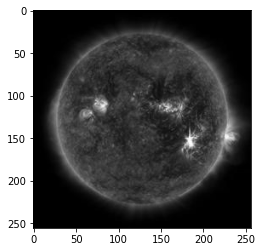

In [28]:
src_img = Image.open(img_path).convert("L")
arr = np.asarray(src_img)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)

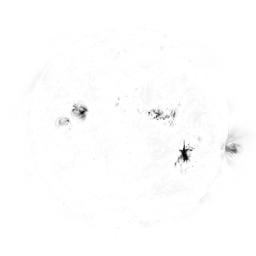

In [29]:
mask_img = Image.fromarray(np.invert(sel))
mask_img

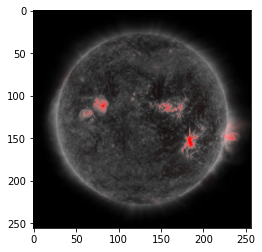

In [30]:
red = Image.new('RGB', (256, 256), color = 'red')

src_img = Image.open(img_path).convert("L")
im = Image.composite(src_img, red, mask_img)
plt.imshow(im, vmin=0, vmax=255)

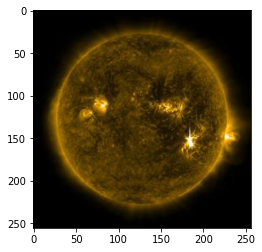

In [31]:
src_img = Image.open(img_path)
arr = np.asarray(src_img)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)

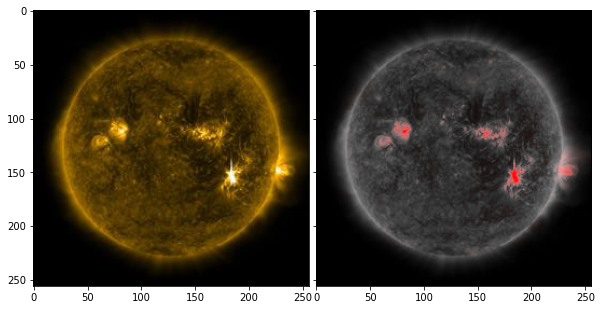

In [32]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, i in zip(grid, [arr, im]):
    # Iterating over the grid returns the Axes.
    ax.imshow(i)